In [61]:
!pip install ucimlrepo

In [62]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA

In [63]:
iris = fetch_ucirepo(id=53)

In [64]:
X = iris.data.features
y = iris.data.targets

In [65]:
X.head()

sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [66]:
y.head()

class
0  Iris-setosa
1  Iris-setosa
2  Iris-setosa
3  Iris-setosa
4  Iris-setosa

In [67]:
data_1=pd.concat([X,y],axis=1)
data_1

sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

## Pairplot using Seaborn

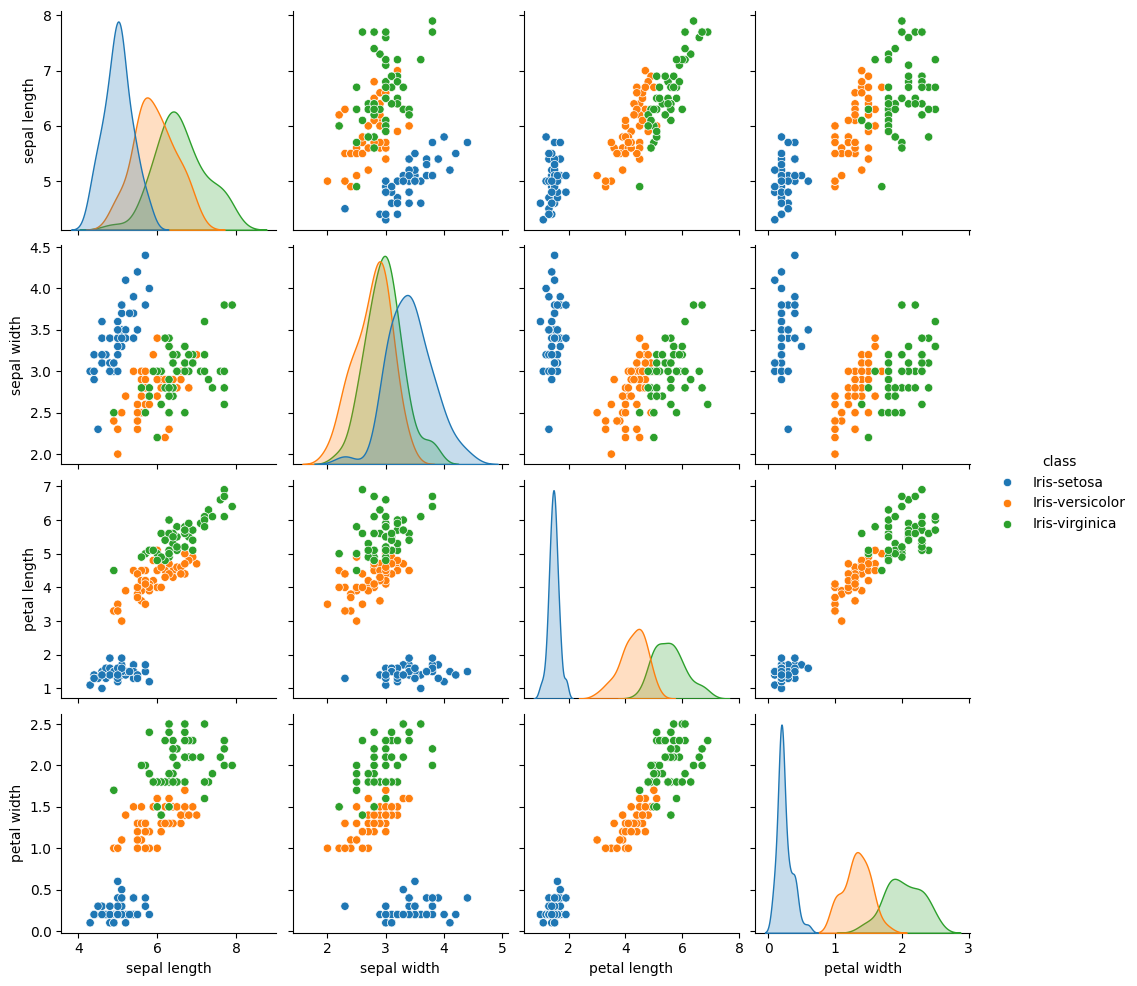

In [68]:
sns.pairplot(data_1,hue='class')

## The following are linearly seperable
### Iris Setosa is the only which is linearly seperable class.

## Performing EDA for WineQT Dataset

In [69]:
data_2=pd.read_csv("WineQT.csv")
data_2.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

### We know that quality is the label in our case

## Finding Null Values

In [70]:
data_2.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

## Describing the Data

In [71]:
data_2.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

## Finding Unique Values

In [72]:
data_2.nunique()

fixed acidity             91
volatile acidity         135
citric acid               77
residual sugar            80
chlorides                131
free sulfur dioxide       53
total sulfur dioxide     138
density                  388
pH                        87
sulphates                 89
alcohol                   61
quality                    6
Id                      1143
dtype: int64

### We can infer that ID Column is redudant and should not be used to find insights in the data

In [73]:
data_eda=data_2.copy()
data_eda=data_eda.drop(['Id'],axis=1)
data_eda.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

## Scatter Plot using Seaborn

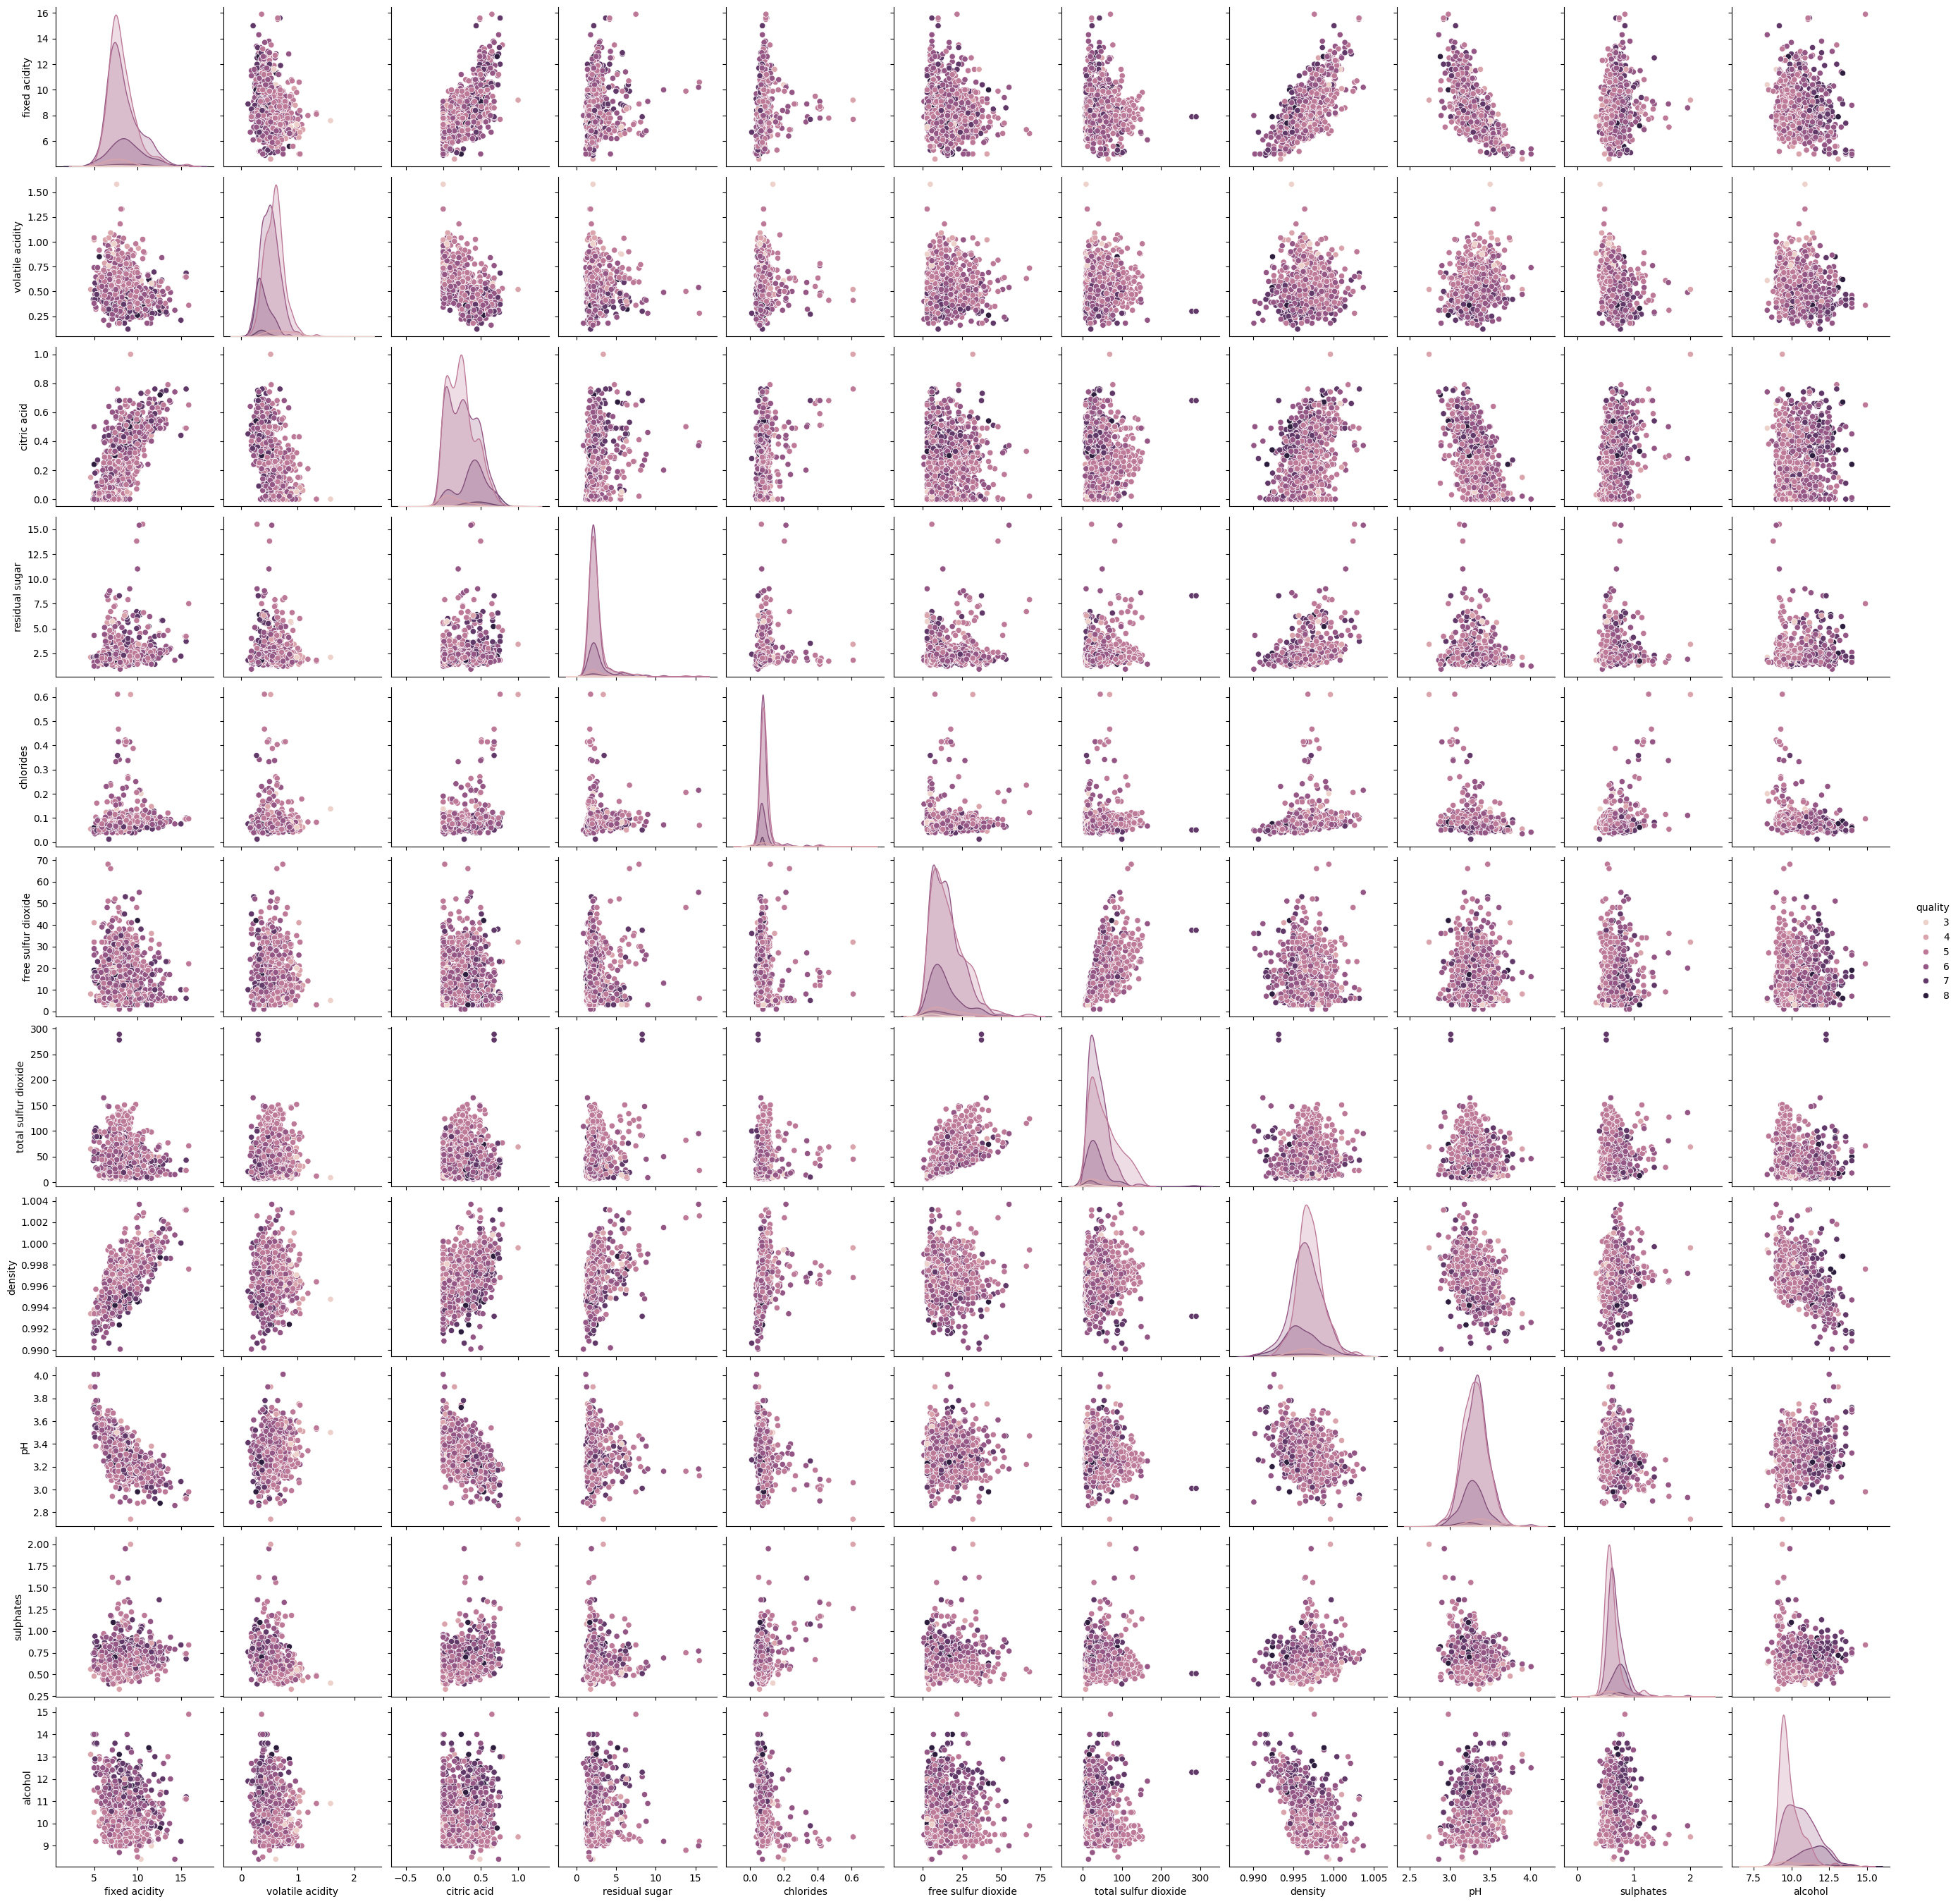

In [74]:
sns.pairplot(data_eda,hue='quality')

## Histogram using Plotly

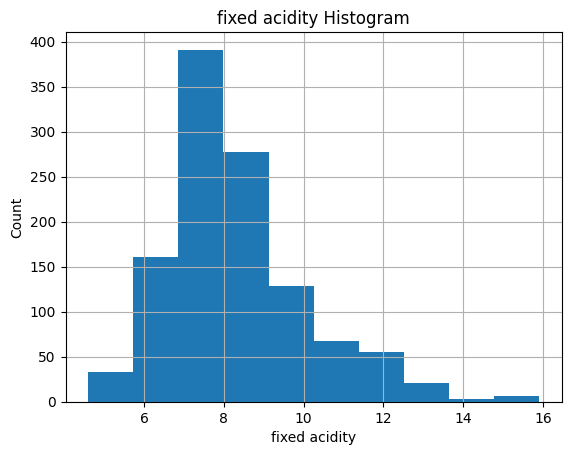

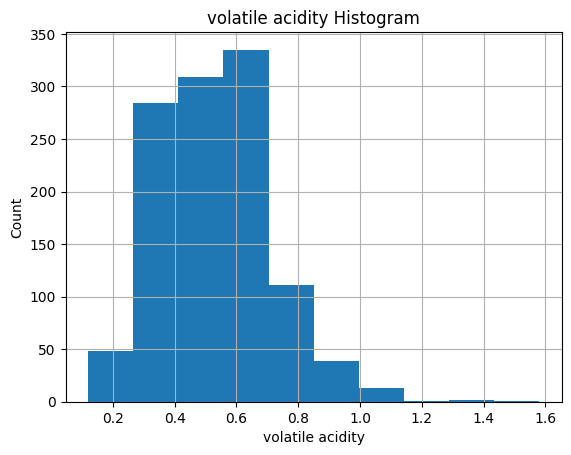

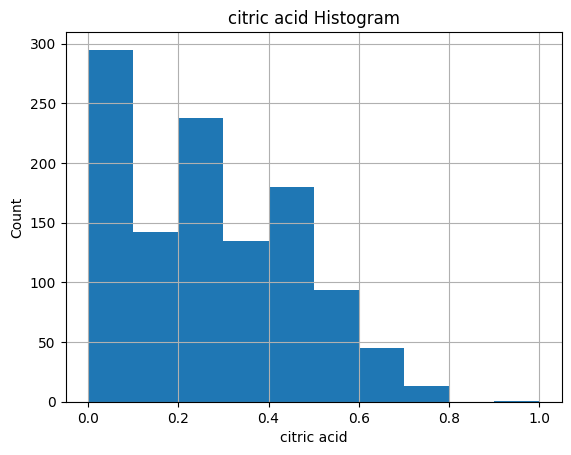

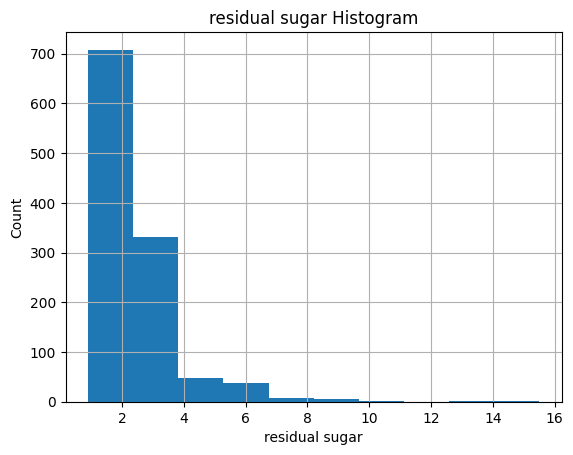

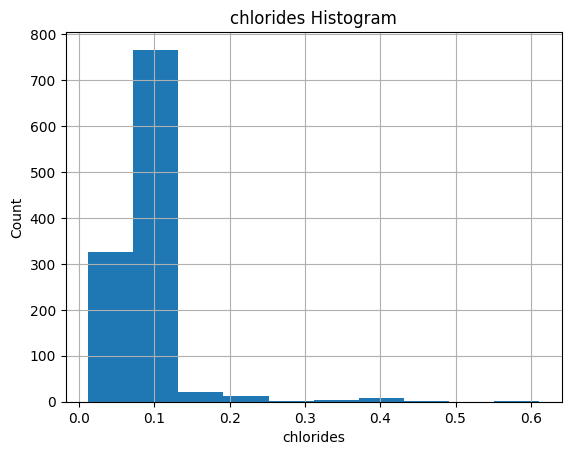

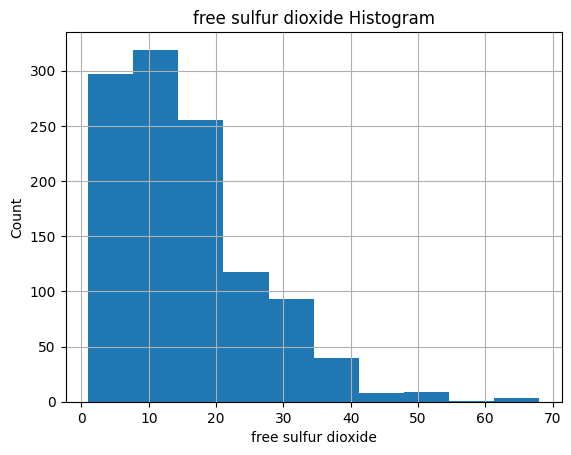

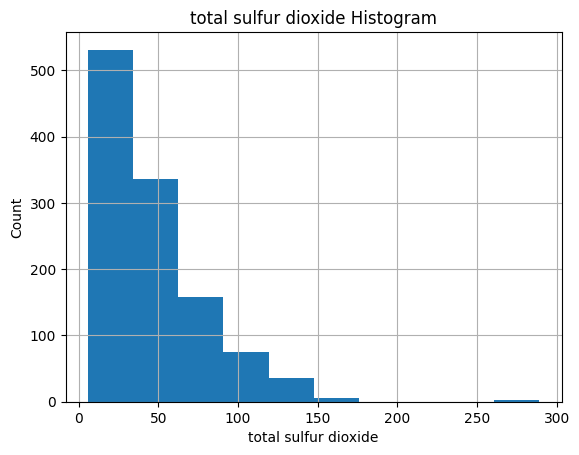

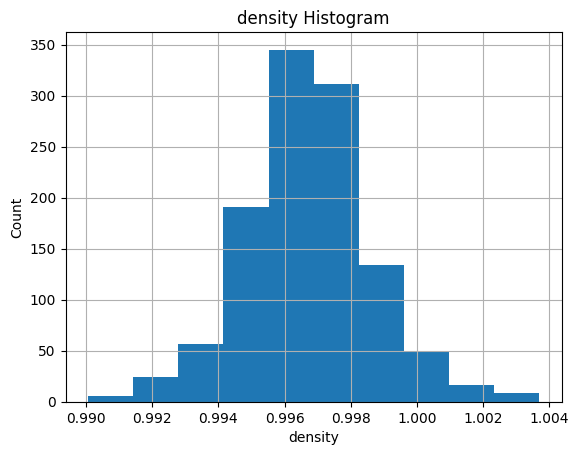

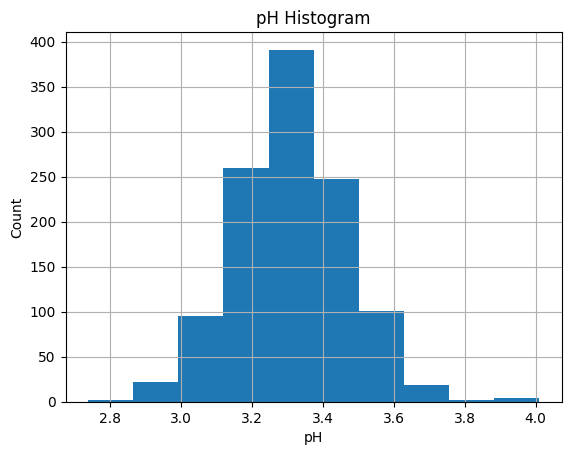

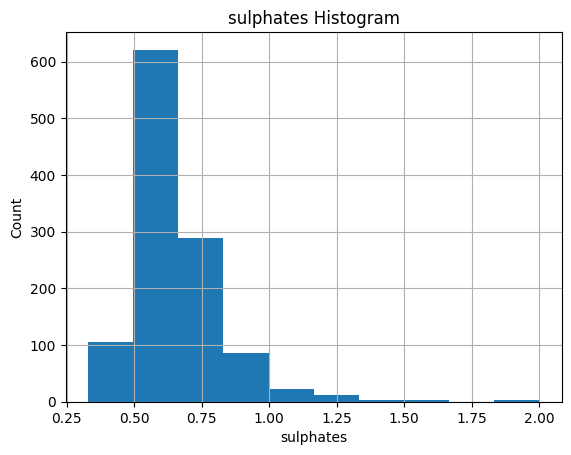

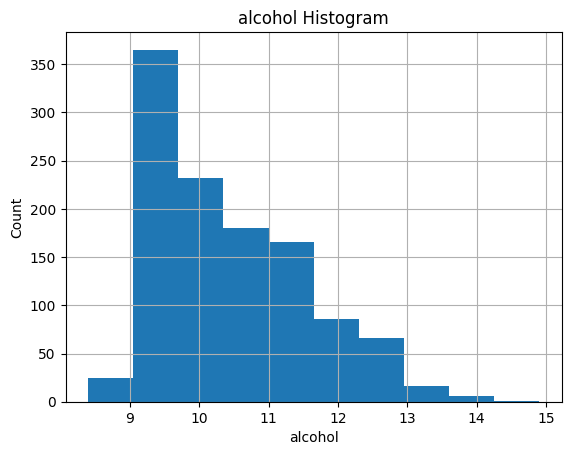

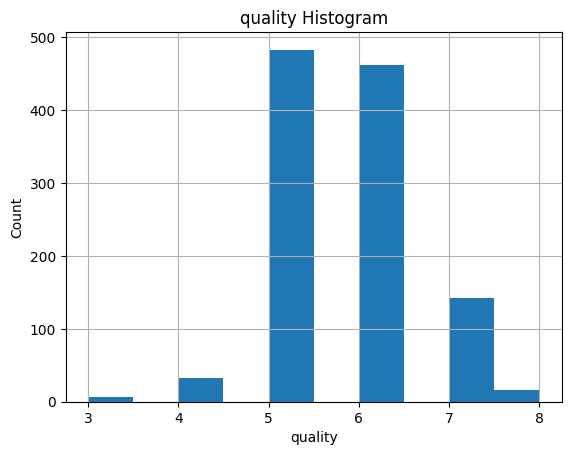

In [75]:
for i,feature in enumerate(data_eda.columns):
  plt.hist(x=data_eda[feature])
  plt.title(f"{feature} Histogram")
  plt.xlabel(f"{feature}")
  plt.ylabel('Count')
  plt.grid('lightgrey')
  plt.show()

## Box Plot using Plotly

In [76]:
column_tuple=tuple(data_eda.columns)
fig = make_subplots(rows=4, cols=3,vertical_spacing=0.1,horizontal_spacing=0.1,subplot_titles=column_tuple)

plots=[]
for feature in (data_eda.columns):
    trace=px.box(data_eda,x=feature)
    plots.append(trace)


for i,feature in enumerate(data_eda.columns):
    row=(i%4)+1
    col=(i%3)+1
    if(i==11):
      continue
    fig.append_trace(plots[i].data[0],row,col)
fig.update_yaxes(title_text="Count")
fig.update_layout(height=1200, width=1200, title_text="Box Plots without Scaling")
fig.show()

As it can be seen there are quite a lot of outliers most of them are observed in sulphates

In [77]:
data_eda_stand=data_eda.copy()
scaler = MinMaxScaler()
data_eda_stand=data_eda_stand.drop(['quality'],axis=1)
data_eda_stand[data_eda_stand.columns]=scaler.fit_transform(data_eda_stand[data_eda_stand.columns])
data_eda_stand.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.149254              0.098940  0.567548  0.606299   0.137725   
1             0.358209              0.215548  0.494126  0.362205   0.209581   
2             0.208955              0.169611  0.508811  0.409449   0.191617   
3             0.238806              0.190813  0.582232  0.330709   0.149701   
4             0.149254              0.098940  0.567548  0.606299   0.137725   

    alcohol  
0  0.153846  
1  0.215385  
2  0.215385  
3  0.215385  
4  0.153846

In [78]:
column_tuple=tuple(data_eda_stand.columns)
fig = make_subplots(rows=4, cols=3,vertical_spacing=0.1,horizontal_spacing=0.1,subplot_titles=column_tuple)

plots=[]
for feature in (data_eda_stand.columns):
    trace=px.box(data_eda_stand,x=feature)
    plots.append(trace)

for i,feature in enumerate(data_eda_stand.columns):
    row=(i%4)+1
    col=(i%3)+1
    if(i==11):
      continue
    fig.append_trace(plots[i].data[0],row,col)
fig.update_yaxes(title_text="Count")
fig.update_layout(height=1200, width=1200, title_text="Box Plots without Scaling")
fig.show()

## Violin Plot using Plotly

In [79]:
column_tuple=tuple(data_eda.columns)
fig = make_subplots(rows=4, cols=3,vertical_spacing=0.1,horizontal_spacing=0.1,subplot_titles=column_tuple)

plots=[]
for feature in (data_eda.columns):
    trace=px.violin(data_eda,x=feature)
    plots.append(trace)

for i,feature in enumerate(data_eda.columns):
    row=(i%4)+1
    col=(i%3)+1
    if(i==11):
      continue
    fig.append_trace(plots[i].data[0],row,col)
fig.update_yaxes(title_text="Count")
fig.update_layout(height=1200, width=1200, title_text="Box Plots without Scaling")
fig.show()

In [80]:
column_tuple=tuple(data_eda_stand.columns)
fig = make_subplots(rows=4, cols=3,vertical_spacing=0.1,horizontal_spacing=0.1,subplot_titles=column_tuple)

plots=[]
for feature in (data_eda_stand.columns):
    trace=px.violin(data_eda_stand,x=feature)
    plots.append(trace)

for i,feature in enumerate(data_eda_stand.columns):
    row=(i%4)+1
    col=(i%3)+1
    if(i==11):
      continue
    fig.append_trace(plots[i].data[0],row,col)
fig.update_yaxes(title_text="Count")
fig.update_layout(height=1200, width=1200, title_text="Box Plots with Scaling")
fig.show()

### Much easier to observe the violin plot after standardisation and easy to identify outliers as well.

## PCA using Plotly

In [81]:
features = data_eda.columns

pca = PCA()
components = pca.fit_transform(data_eda[features])
fig = px.scatter_matrix(
    components,
    dimensions=range(3),
    color=data_eda["quality"]
)
fig.update_traces(diagonal_visible=False)
fig.show()


In [82]:
features = data_eda_stand.columns

pca = PCA()
components = pca.fit_transform(data_eda_stand[features])
fig = px.scatter_matrix(
    components,
    dimensions=range(3),
    color=data_eda["quality"]
)
fig.update_traces(diagonal_visible=False)
fig.show()
